<center>
<img src="https://miro.medium.com/max/2880/1*DHfQvlMVBaJCHpYmj1kmCw.png" width=800>
</center>


# 1. Introduction

<div style="color:white;display:fill;
            background-color:#e38e05;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 4px;color:white;"><b>1.1 Market Basket Analysis Purpose</b></p>
</div>

To increase sell by

> * Finding the best ways to create promotions or apply discounts on particular items
> * Finding the pattern occuring to sales to apply promotions more accurately


**Dataset Description [Dataset](http://www.kaggle.com/datasets/farjanakabirsamanta/analytics-case-studyecommerce)**

 Total 5 columns
> *  `Product` : Product Specification
> *  `Product Category` : The category to which product belongs
> *  `Transaction ID`: Purchase Record ID for particular product
> *  `Unique Purchases` : Unique purchased Amount for particular product
> *  `Product Revenue` : Total revenue for particular product

<div style="color:white;display:fill;
            background-color:#e38e05;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 4px;color:white;"><b>1.2 What is Market Basket Analysis?</b></p>
</div>

> * It is an accidental **transaction pattern** that **purchasing some products** will **affect** the **purchasing of other products**
> * It is used to **predict** what **products** that **customer** interested in
> * It helps sellers or reatilers to find a **patterns** that shows which items are **frequently purchased together** so that he/she could apply **a discounts** into a **particular items** **more accurately**.

<hr>

<div style="color:white;display:fill;
            background-color:#e38e05;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 4px;color:white;"><b>1.3 Libraries</b></p>
</div>

In [1]:
# Import Libraries for association rule mininig to find frequent patterns
import pandas as pd
import numpy as np
from mlxtend.frequent_patterns import apriori, association_rules

# Import Libraries for Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import re
import networkx as nx

# 2. Data

<div style="color:white;display:fill;
            background-color:#e38e05;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 4px;color:white;"><b>2.1 Data frames</b></p>
</div>


In [2]:
# Read csv file, file is encoded in 'latin'
df = pd.read_csv('dataset.csv', encoding='latin')

# show first few entries
df.head()

,Product,Product Category (Enhanced Ecommerce),Transaction ID,Unique Purchases,Product Revenue
0,3.7V 3400mah LIION 12.6WH,Battery/Consumer Rechargeable,EC0043605902,47,"$1,597.53"
1,3V PHOTO LITHIUM,Battery/Primary Other,EC0043507670,47,"$1,246.44"
2,12V 11.2AH 225CCA AGM 12/0,Battery/Powersports,EC0043504182,41,"$4,714.59"
3,12V 12AH 165CCA FLOODED 6/0,Battery/Powersports,EC0043503186,39,"$2,456.61"
4,12V 12AH 210CCA AGM 12/0,Battery/Powersports,EC0043406547,34,"$3,570.00"


In [3]:
# show random 10 entries
df.sample(10)

,Product,Product Category (Enhanced Ecommerce),Transaction ID,Unique Purchases,Product Revenue
16898,12.8V LIFEPO4,Battery/Powersports,EC0043201783,1,$164.99
30263,12V 24M MARINE 12,Battery/Marine/RV,EC0043203131,1,$109.99
9512,AGM 12V 5AH .187 FASTON,Battery/Sealed Lead Acid,EC0043907531,2,$77.98
46337,12V 6.5AH LEAD,Battery/Sealed Lead Acid,EC0043006382,1,$40.99
74562,9V ALKAL,Battery/Primary Common,EC0043702910,1,$180.00
90645,OPTIMA 720CCA,Battery/Auto/Light Truck,EC0043107595,1,$239.99
64138,3.7V 2700MAH LIION 9.99WH,Battery/Cellular,EC0043606535,1,$39.99
6243,12V 6.5AH 85CCA AGM 12/0,Battery/Powersports,EC0043000972,2,$185.78
89348,GRP 31 AGM DUAL X2 MARINE,Battery/Marine/RV,EC0043807331,1,$459.99
87982,F13T5/CW,Bulb/Fluorescent,EC0044000520,1,$29.96


In [4]:
# Short Info of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92250 entries, 0 to 92249
Data columns (total 5 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   Product                                92250 non-null  object
 1   Product Category (Enhanced Ecommerce)  92250 non-null  object
 2   Transaction ID                         92250 non-null  object
 3   Unique Purchases                       92250 non-null  int64 
 4   Product Revenue                        92250 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.5+ MB


In [5]:
# Statistical analysis of data
df.describe()

,Unique Purchases
count,92250.000000
mean,1.164564
std,0.676474
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,47.000000


# 3. EDA
<div style="color:white;display:fill;
            background-color:#e38e05;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 4px;color:white;"><b>3.1 Data Cleaning</b></p>
</div>

In [6]:
# Dropping all null values
df = df.dropna()

**Taking the positive quantity values**

In [7]:
df = df[df['Unique Purchases']>=0]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92250 entries, 0 to 92249
Data columns (total 5 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   Product                                92250 non-null  object
 1   Product Category (Enhanced Ecommerce)  92250 non-null  object
 2   Transaction ID                         92250 non-null  object
 3   Unique Purchases                       92250 non-null  int64 
 4   Product Revenue                        92250 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.5+ MB


**Dropping row where Transaction Id is missing**

In [8]:
df.drop(df[df['Transaction ID'] == '<transaction id>'].index, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 92249 entries, 0 to 92249
Data columns (total 5 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   Product                                92249 non-null  object
 1   Product Category (Enhanced Ecommerce)  92249 non-null  object
 2   Transaction ID                         92249 non-null  object
 3   Unique Purchases                       92249 non-null  int64 
 4   Product Revenue                        92249 non-null  object
dtypes: int64(1), object(4)
memory usage: 4.2+ MB


<div style="color:white;display:fill;
            background-color:#e38e05;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 4px;color:white;"><b>3.2 Top 15 Products</b></p>
</div>

In [9]:
x = df['Product'].value_counts().sort_values(ascending=False)[:15]
x

Product
12V U1 L&amp;G 6                  2425
6V GC2 ULTRA GOLF 12              1684
AGM 12V 7AH .187 FASTON           1642
12V 18AH 310CCA AGM 12/0          1204
12V 31DT DURACELL ULTRA AGM 30    1118
AGM 12V 5AH .187 FASTON           1077
DC 12V 35AH J TERM                1005
12V 17.5AH 310 CCA                 996
1.5V IND AA ALK BULK               979
1.5V ALKAL                         977
12V 30AH 400 CCA                   940
12V U1R L&amp;G 6                  928
1.55V SVROX                        925
12V 27 MARINE DP 12                922
12V 24 MARINE DP 12                900
Name: count, dtype: int64

TypeError: barplot() takes from 0 to 1 positional arguments but 2 were given

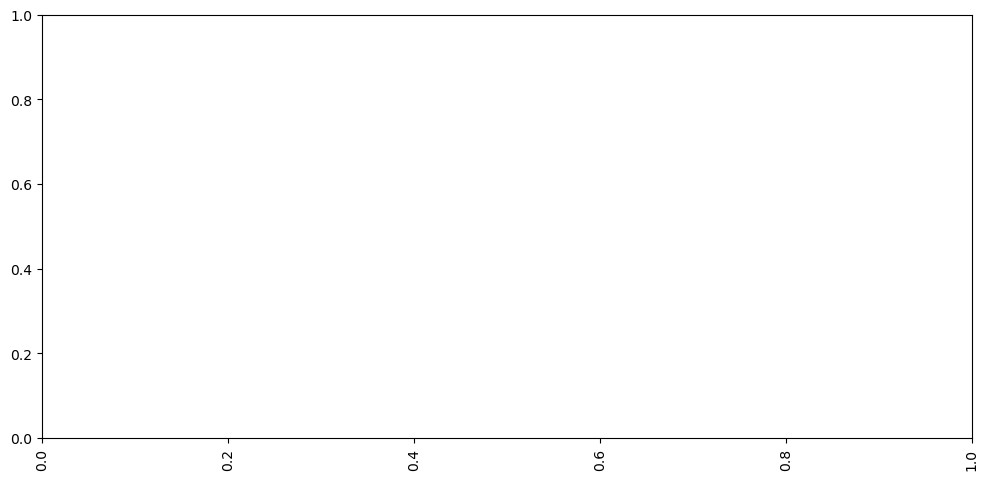

In [10]:
plt.figure(figsize=(12,5.5))
plt.xticks(rotation = 90)
sns.barplot(x.index,x.values)

# 4. Data Preparing
<div style="color:white;display:fill;
            background-color:#e38e05;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 4px;color:white;"><b>4.1 Creating the basket</b></p>
</div>

> * Data is grouped by the transaction (`Transaction ID`) & the items (`Product`) and the values of `Quantity` of each item bought is shown.
> * After, the value is `sum up` and `unstacked`.
> * Lastly, the index of the data frame is changed to the `Transaction ID` so that we could see the `quantity of each item` bought per `InvoiceNo`.
> * This dataframe is basically the `basket` that customers `carry on` to the cashier in shop.
> * It shows us how much this customer / transaction (`Transaction ID`) bought a particular item. 
> * If the number is `0`, then this customer `didn’t buy` that particular item. If it shows another value (`12` for instances), it means that the customer has `bought` as many as `12 items`.

In [ ]:
basket_plus = (df.groupby(['Transaction ID', 'Product'])['Unique Purchases']
               .sum().unstack().reset_index().fillna(0).set_index('Transaction ID'))
basket_plus

**Dropping `not set` column because it represents Product are missing**

In [ ]:
basket_plus.drop('(not set)', axis=1, inplace=True)
basket_plus

<div style="color:white;display:fill;
            background-color:#e38e05;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 4px;color:white;"><b>4.2 Encoding the Data</b></p>
</div>

> * In `market basket analysis`, the `number of each item` bought is `not` really `important`. 
> * The important is whether an item is `bought or not`
> * The reason is to know, what is the `association of buying some items and buying some others`
> * The `basket data` is `encoded` into a `binary data` that shows whether `an items is bought (1) or not (0)`
> * **encode_units function** - encode the units i.e. If the `units` is `equal to or less than 0`, the function will change it into `0 (Not bought)`. If the units is `more than or equal to 1`, it will change the units into `1 (bought)`.

In [ ]:
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1
    
basket_encode_plus = basket_plus.applymap(encode_units)
basket_encode_plus

<div style="color:white;display:fill;
            background-color:#e38e05;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 4px;color:white;"><b>4.3 Filtering The Transaction(Bought More Than 1 Items Only)</b></p>
</div>

* In **market basket analysis**, purpose is to `uncover` the `association between 2 or more items` that is `bought` according to **historical data**.
* So, it is `less useful` if `a transaction` only bought a `single item`

In [ ]:
basket_filter_plus = basket_encode_plus[(basket_encode_plus > 0).sum(axis=1) >= 2]
basket_filter_plus

* According to the result above, there are **6321** `transaction` that `bought more than 1 items`.
* It means, **(6321 % 83013) * 100 = 7.61 %** of the basket data is a `transaction` that is `bought more than 1 item`.

# 5. Algorithm
<div style="color:white;display:fill;
            background-color:#e38e05;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 4px;color:white;"><b>5.1 Association Rules</b></p>
</div>

Assume there are 100 customers:

> * 10 of them bought milk, 8 bought butter and 6 bought both of them.
> * suppose, we are trying to find a pattern : **bought milk => bought butter**
> * **support** = **P(Milk & Butter) = 6/100 = 0.06, means 0.06 * 100 = 6%** transactions that customer `bought milk and butter together`
> * **confidence** = **support/P(Butter) = 0.06/0.08 = 0.75, means 0.75 * 100 = 75%** that customer who `bought milk, also bought butter`
> * **lift** = **confidence/P(Milk) = 0.75/0.10 = 7.5**, indicates the `strength of the rule or pattern`, `lift > 1` means rule does `not occur by random pattern`

<div style="color:white;display:fill;
            background-color:#e38e05;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 4px;color:white;"><b>5.2 Apriori Algorithm</b></p>
</div>

* It is useful in `mining frequent itemsets` and `relevant association rules`. 
* Terminology:
    1. **k-itemset**: a set of k items. e.g. {beer, diapers, juice} is a 3-itemset; {cheese} is a 1-itemset; {honey, ice-cream} is a 2-itemset

    2. **Minimum support**: The Apriori algorithm starts a specified minimum level of support, and focuses on itemsets with at least this level.
* It initially scans and determines the `frequency of individual items` (i.e. the item set size, k = 1).
For example, if itemset `{A, B} is not frequent`, then we can `exclude all item set combinations` that `include {A, B}`

<div style="color:white;display:fill;
            background-color:#e38e05;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 4px;color:white;"><b>5.3 A full run through of Apriori</b></p>
</div>

<img src="https://miro.medium.com/max/1400/1*qdRuq1iyzncDbu8N1FFUNw.png">

<img src ="https://miro.medium.com/max/720/1*9lcn59ELXyFTTw12WQGrAA.png">

**Step 6**: To make the set of three items we need one more rule (it’s termed a self-join). It simply means, from the Item pairs in the above table, we find two pairs with the same first Alphabet, so we get **OK** and **OE**, this gives **OKE**, **KE** and **KY**, this gives **KEY**

<img src = "https://miro.medium.com/max/640/1*9UHnbTh0ohwdcmBj8XmmTw.png">

<div style="color:white;display:fill;
            background-color:#e38e05;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 4px;color:white;"><b>5.3 Applying the Apriori Algorithm</b></p>
</div>


In [ ]:
frequent_itemsets_plus = apriori(basket_filter_plus, min_support=0.03, 
                                 use_colnames=True).sort_values('support', ascending=False).reset_index(drop=True)

frequent_itemsets_plus['length'] = frequent_itemsets_plus['itemsets'].apply(lambda x: len(x))

frequent_itemsets_plus

# 6. Results
<div style="color:white;display:fill;
            background-color:#e38e05;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 4px;color:white;"><b>6.1 Frequently Bought Items</b></p>
</div>

* In **apriori algorithm**, we are able to `define` the `frequent data` defined by the given `support value`
* `A frequently bought items` are defined as an items that is bought `as many as 3%` out of the whole transaction i.e. **support value 0.03**
* Column length that contain the number of item that is bought
* There are **13** transaction that is consider as a `frequently bought items`
* **1.5V IND AA ALK BULK** is the most frequently bought items with the `support value` of **0.115013**, it means the item is bought = **6321 * .115013 = 727 times** out of the `whole transaction`.

**Frequently bought 1 item**

In [ ]:
frequent_itemsets_plus[ (frequent_itemsets_plus['length'] == 1)]

**Frequently bought 2 items together**

In [ ]:
frequent_itemsets_plus[ (frequent_itemsets_plus['length'] == 2)]

<div style="color:white;display:fill;
            background-color:#e38e05;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 4px;color:white;"><b>6.2 Finding The Association Between Frequently Bought Items </b></p>
</div>

**From association rules, we could extract information and even discover knowledge about which items that is more effective to be sold together.**

In [ ]:

rules = association_rules(frequent_itemsets_plus, metric='lift', 
                  min_threshold=1).sort_values('lift', ascending=False).reset_index(drop=True)
rules

<div style="color:white;display:fill;
            background-color:#e38e05;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 4px;color:white;"><b>6.3 3D Scatter Plot of rules </b></p>
</div>

> * **Association rules** are plotted in a `3D scatter plot`. 
> * `Rules` that are `closer to top right` are the rules that can be the `most meaningful`.

In [ ]:
sns.set(style = "whitegrid")
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection = '3d')


x = rules['support']
y = rules['confidence']
z = rules['lift']

ax.set_xlabel("Support")
ax.set_ylabel("Confidence")
ax.set_zlabel("Lift")

ax.scatter(x, y, z)
ax.set_title("3D Distribution of Association Rules")

plt.show()

<div style="color:white;display:fill;
            background-color:#e38e05;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 4px;color:white;"><b>6.4 Network Graph of relationships between the products </b></p>
</div>

In [ ]:
def draw_network(rules, rules_to_show):
    
    # Directional Graph from Networkx
    network = nx.DiGraph()
    
    # Loop through number of rules to show
    for i in range(rules_to_show):
        # Add a Rule Node
        network.add_nodes_from(["R" + str(i)])
        for antecedents in rules.iloc[i]['antecedents']:
            # Add antecedent node and link to rule
            network.add_nodes_from([antecedents])
            network.add_edge(antecedents, "R" + str(i), weight = 2)
            
        for consequents in rules.iloc[i]['consequents']:
            # Add consequent node and link to rule
            network.add_nodes_from([consequents])
            network.add_edge("R" + str(i), consequents, weight = 2)
    
    color_map = []
    
    # For every node, if it's a rule, color as Black, otherwise Orange

    for node in network:
        if re.compile("^[R]\d+$").fullmatch(node)!=None:
            color_map.append('black')
        else:
            color_map.append('orange')
            
    # Position nodes using spring layout
    pos = nx.spring_layout(network, k=16, scale=1)
    
    # Draw the network graph
    nx.draw(network, pos, node_color = color_map, font_size = 8)
    
    # Shift the test position upwards
    for p in pos:
        pos[p][1] += 0.12

    nx.draw_networkx_labels(network, pos)
    plt.title("Network Graph for Association Rules")
    plt.show()
    
draw_network(rules, 7)

<div style="color:white;display:fill;
            background-color:#e38e05;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 4px;color:white;"><b>6.5 Association Rules Interpretation </b></p>
</div>

* From the `association_rules results` above, **1.5V IND AA ALK BULK and 1.5V IND AAA ALK BULK** are the items that has the **highest association** each other since these two items has the `highest “lift” value`.
*` The higher the lift value`, `the higher the associatio`n between the items willl. If the `lift value` is `more than 1`, it is enough for us to say that those `two items are associated each other`.
* In thise case, the `highest value` is **6.699549** which is very high. It means these `2 items` are very `good` to be `sold together`.
* The `support value` of **1.5V IND AA ALK BULK and 1.5V IND AAA ALK BULK** are **0.086062** which means there are **8.60%** out of total transaction that these 2 items were sold together. In number, it is **6321 * 0.086062 = 544 times**.
* The confidence value is influenced by the antecedent and consequent.
* If the `antecedent is higher than the consequent`, then the rule that will be applied is rule number 1 (not number 2). vice versa.
* In this case, the antecedent value is higher than the consequent value. It means we will apply rule number 1 which is 1.5V IND AA ALK BULK and 1.5V IND AAA ALK BULK.
* It means that a customer will tends to bought `1.5V IND AAA ALK BULK`, `AFTER` they `bought 1.5V IND AA ALK BULK`.
* This could be a `very valuable information`, We could give a `discounts` on **1.5V IND AAA ALK BULK** if a customer buy **1.5V IND AA ALK BULK**.

# 7. Data-driven marketing strategy and decision making

<center>
    <img src = "https://www.stratlytics.com/upload/1576230674.jpg">
</center>

<div style="color:white;display:fill;
            background-color:#e38e05;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 4px;color:white;"><b>7.1 Item Placements </b></p>
</div>

We could put **1.5V IND AAA ALK BULK and 1.5V IND AA ALK BULK** in a `closer place`, maybe in a `same shelf` or `any other closer place`.

<div style="color:white;display:fill;
            background-color:#e38e05;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 4px;color:white;"><b>7.2 Products Bundling </b></p>
</div>

> * We could put **1.5V IND AAA ALK BULK and 1.5V IND AA ALK BULK** as `a single bundle` of product `with a lower price` compare to each price combined. 
> * This way will attract `more sales` and generates `more income`.

<div style="color:white;display:fill;
            background-color:#e38e05;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 4px;color:white;"><b>7.3 Customer Recommendation and Discounts </b></p>
</div>

> * We could put **1.5V IND AAA ALK BULK** in the `cashier`, 
> * So that every time a customer bought **1.5V IND AA ALK BULK**, we could `offer and recommend` them to buy **1.5V IND AAA ALK BULK** with a `lower price`.

<div style="color:white;display:fill;
            background-color:#e38e05;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 4px;color:white;"><b>7.4 Association Rules with Most Strength </b></p>
</div>

In [ ]:
rules[(rules['lift'] >= 6) &
       (rules['confidence'] >= 0.5)]

<div style="color:white;display:fill;
            background-color:#e38e05;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 4px;color:white;"><b>7.5 Another Demonstration to increase sell of one item through another item </b></p>
</div>

<center><div style="color:white;
            height: 30px;
            width: 250px;
            border-radius:20px 20px;
            background-color:#5BB318;font-size:100%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding:4px;color:white;text-align:center; border-radius:20px 20px;"><b>7.5.1 Demonstration - 1 </b></p>
</div>
</center>

In [ ]:
basket_plus['1.5V IND AAA ALK BULK'].sum()

In [ ]:
basket_plus['1.5V IND AA ALK BULK'].sum()

> * We sell **1022 quantity** of **1.5V IND AA ALK BULK** but **only 806 quantity** of **1.5V IND AAA ALK BULK** 
> * so maybe we can drive `more` **1.5V IND AAA ALK BULK** `sales` `through recommendations`.

<center><div style="color:white;
            height: 30px;
            width: 250px;
            border-radius:20px 20px;
            background-color:#5BB318;font-size:100%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding:4px;color:white;text-align:center; border-radius:20px 20px;"><b>7.5.2 Demonstration - 2 </b></p>
</div>
</center>

In [ ]:
basket_plus['1.5V ALKAL'].sum()

In [ ]:
basket_plus['1.5V ALKALINE AA CONTRACTOR 24PK'].sum()

> * We sell **1163 quantity** of **1.5V ALKAL** but **only 715 quantity** of **1.5V ALKALINE AA CONTRACTOR 24PK** 
> * so maybe we can `drive more` **1.5V ALKALINE AA CONTRACTOR 24PK** `sales through recommendations`.

# 8. Strength
* It is the most `simple` and `easy-to-understand` algorithm among **association rule** learning algorithms
* It gives`constant results everytime`
* The `resulting rules` are `intuitive` and `easy to communicate` to an `end-user`

# 9. Limits
* If the number of transactions is large and there is a restricted memory capacity,the algorithm's efficiency will be reduced
* As it needs to scan the whole database, high processing power is required

# 10. Conclusion

<center>
    <img src = "https://datamathstat.files.wordpress.com/2018/02/untitled.png">
</center>

Here, 
* Market Basket analysis is done using **Apriori Algorithm** and **Association Rules**
* Recommendation is provided for **Upselling** and **Cross Selling** through giving ideas of    **Item Placements**, **Product Bundling** and **Applying Discounts** 
* Rules are visualized through **3D Scatter Plot** and **Network Graph**

## **<center><span style="color:#FEF1FE;background-color:#023e8a;border-radius: 5px;padding: 5px">Thanks for reading! Please feel free to provide suggestions or feedbacks :)</span></center>**